In [1]:
import os
import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Link do pliku na Google Drive
url = 'https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D'
output_file = 'internet_service_churn.csv'
output_dir = 'data'  # Zmieniamy ścieżkę na 'internet_service_churn'

# Pobieranie pliku
print("Pobieranie pliku...")
gdown.download(url, output_file, quiet=False)

# Sprawdzanie, czy katalog istnieje
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Sprawdzanie, czy plik jest plikiem ZIP i rozpakowywanie go
if zipfile.is_zipfile(output_file):
    try:
        with zipfile.ZipFile(output_file, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        print("Plik ZIP został rozpakowany.")
    except zipfile.BadZipFile:
        print("Błąd: plik ZIP jest uszkodzony lub nie jest plikiem ZIP.")
    except Exception as e:
        print(f"Wystąpił błąd: {e}")
    finally:
        # Usuwanie pliku ZIP
        if os.path.exists(output_file):
            os.remove(output_file)
            print(f"Plik {output_file} został usunięty.")
else:
    print(f"Plik {output_file} nie jest plikiem ZIP. Przenoszę do katalogu docelowego.")
    os.rename(output_file, os.path.join(output_dir, output_file))

# Funkcja do wyświetlania tylko struktury katalogów
def list_directory_structure(path):
    for root, dirs, _ in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")

# Sprawdzanie zawartości katalogu 'internet_service_churn'
print("\nStruktura katalogu 'internet_service_churn':")
list_directory_structure(output_dir)

# Funkcja do wyszukiwania plików CSV w podfolderach
def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Znajdowanie wszystkich plików CSV w folderze docelowym
csv_files = find_csv_files(output_dir)

# Sprawdzenie, czy znaleziono jakiekolwiek pliki CSV
if not csv_files:
    raise FileNotFoundError("Nie znaleziono żadnych plików CSV po rozpakowaniu lub przeniesieniu.")

# Wczytanie danych z pierwszego znalezionego pliku CSV
csv_file = csv_files[0]
df = pd.read_csv(csv_file)

# Podgląd danych
print("\nPierwsze 5 wierszy danych:")
print(df.head())


Pobieranie pliku...


Downloading...
From: https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D
To: D:\01_Kursy\01_Python developer\GoIT\GitHub\Data Science project-group\to-churn-or-not-to-churn\internet_service_churn.csv
100%|█████████████████████████████████████████████████████████████████| 782k/782k [00:00<00:00, 6.98MB/s]


Plik ZIP został rozpakowany.
Plik internet_service_churn.csv został usunięty.

Struktura katalogu 'internet_service_churn':
data/

Pierwsze 5 wierszy danych:
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN      

> # Analiza danych

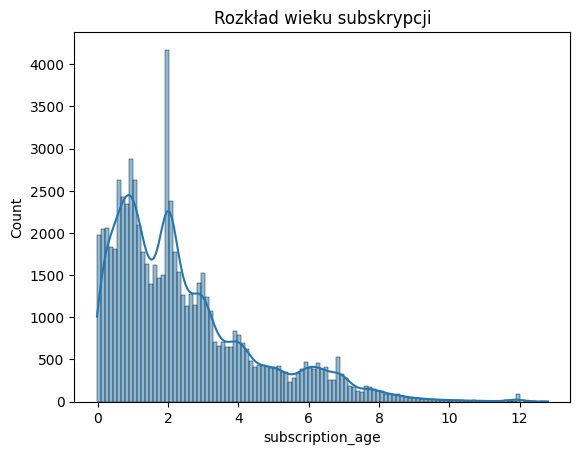

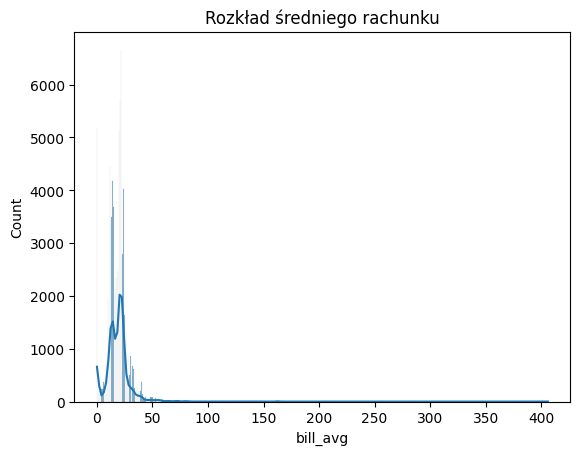

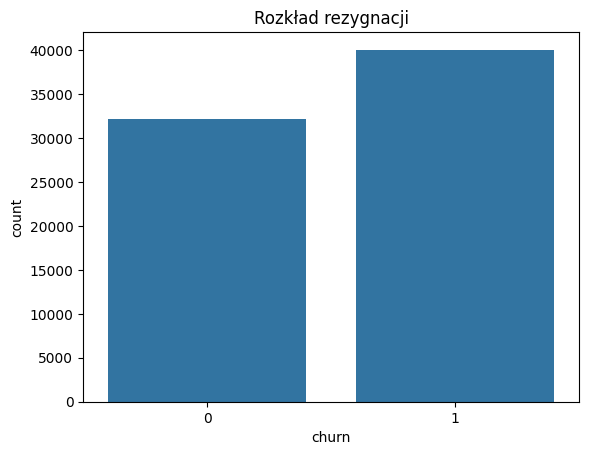

In [3]:
# Rozkład zmiennej 'subscription_age'
sns.histplot(df['subscription_age'], kde=True)
plt.title('Rozkład wieku subskrypcji')
plt.show()

# Rozkład zmiennej 'bill_avg'
sns.histplot(df['bill_avg'], kde=True)
plt.title('Rozkład średniego rachunku')
plt.show()

# Rozkład zmiennej 'churn'
sns.countplot(x='churn', data=df)
plt.title('Rozkład rezygnacji')
plt.show()


In [4]:
# Sprawdzenie czy są jakieś zmienne z brakującymi wartościami
missing_values = df.isna().sum()
print("Liczba pustych miejsc w każdej kolumnie:")
print(missing_values)

if any(missing_values > 0):
    print("\nCzy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Tak")
else:
    print("\nCzy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Nie")

Liczba pustych miejsc w każdej kolumnie:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Czy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Tak


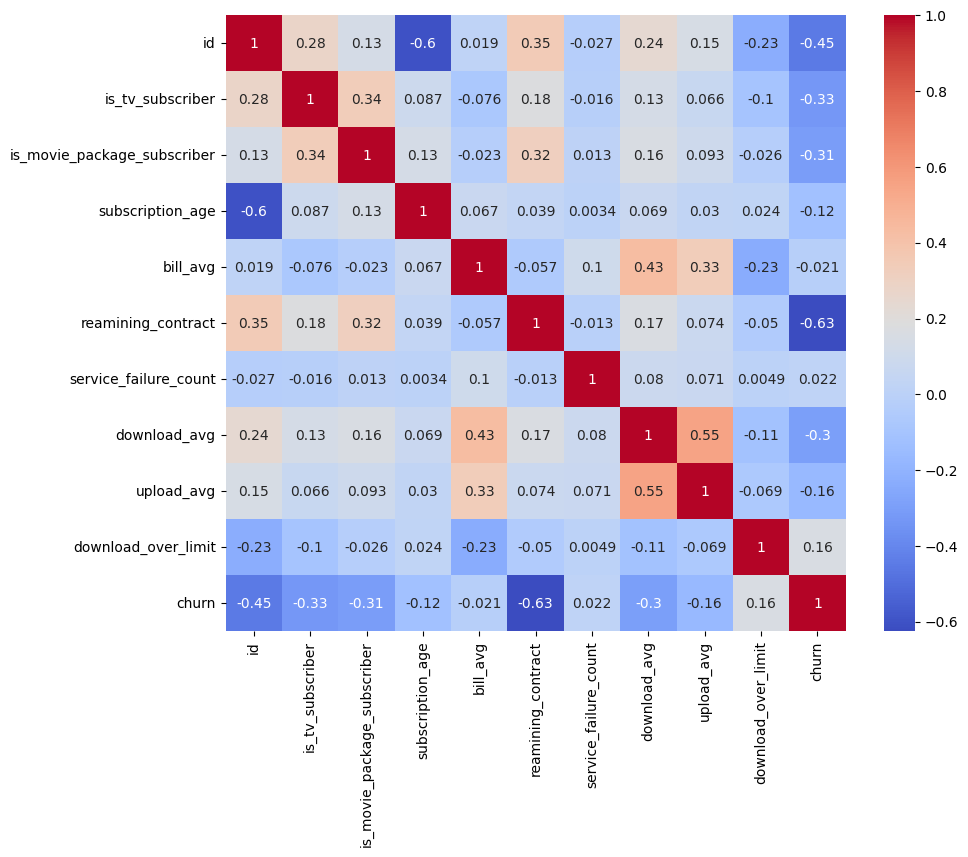

In [5]:
# Macierz korelacji
corr = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


> # Wstępne przetwarzanie danych

In [6]:
# Zakładam, że NaN w kolumnie reamining_contract nie oznacza braku kontraktu
# Uzupełnianie brakujących wartości kolumny 'reamining_contract' medianą
df['reamining_contract'].fillna(df['reamining_contract'].median(), inplace=True)

# Lub usunięcie kolumny, jeśli jest zbyt mało przydatna
# data.drop('reamining_contract', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8400\1856167468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reamining_contract'].fillna(df['reamining_contract'].median(), inplace=True)


In [7]:
# Zakładam, że NaN w kolumnach download_avg, i upload_avg nie oznacza braku aktywności
# Uzupełnianie brakujących wartości
df['download_avg'].fillna(df['download_avg'].median(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8400\1934625220.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['download_avg'].fillna(df['download_avg'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8400\1934625220.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [8]:
# Sprawdzenie, czy w kolumnach nadal są NaN
print(df[['reamining_contract', 'download_avg', 'upload_avg']].isna().sum())


reamining_contract    0
download_avg          0
upload_avg            0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Wybór cech do normalizacji
features_to_scale = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']

# Normalizacja cech
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


# Model TensorFlow/Keras

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

### Data Preparation

In [11]:
X = df.drop(columns=['id', 'churn'])  # Removing 'id' and 'churn' columns from the data
y = df['churn']  # Target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Definition

In [12]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

### Model Compilation

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Early Stopping

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Model Training

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8235 - loss: 0.4080 - val_accuracy: 0.8603 - val_loss: 0.3322
Epoch 2/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8554 - loss: 0.3454 - val_accuracy: 0.8787 - val_loss: 0.2984
Epoch 3/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8782 - loss: 0.3090 - val_accuracy: 0.9007 - val_loss: 0.2596
Epoch 4/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8946 - loss: 0.2832 - val_accuracy: 0.9049 - val_loss: 0.2463
Epoch 5/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9030 - loss: 0.2656 - val_accuracy: 0.9177 - val_loss: 0.2288
Epoch 6/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9099 - loss: 0.2533 - val_accuracy: 0.9166 - val_loss: 0.2246
Epoch 7/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9136 - loss: 0.2459 - val_accuracy: 0.9156 - val_loss: 0.2232
Epoch 8/100
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9121 - loss: 0

### Model Saving

In [16]:
model.save('model_TensorFlow-Keras.keras')

### Model Evaluation and Classification Report

In [22]:
# Evaluating the Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predicting values on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculating Additional Metrics
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f'Test Precision: {test_precision * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')
print(f'Test F1 Score: {test_f1 * 100:.2f}%')

# Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.9298 - loss: 0.1959
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step

Test Accuracy: 93.20%
Test Precision: 94.30%
Test Recall: 93.19%
Test F1 Score: 93.74%

Classification Report:
              precision    recall  f1-score   support

           0     0.9190    0.9321    0.9255      6553
           1     0.9430    0.9319    0.9374      7902

    accuracy                         0.9320     14455
   macro avg     0.9310    0.9320    0.9315     14455
weighted avg     0.9322    0.9320    0.9320     14455



### Visualizing the Training Process

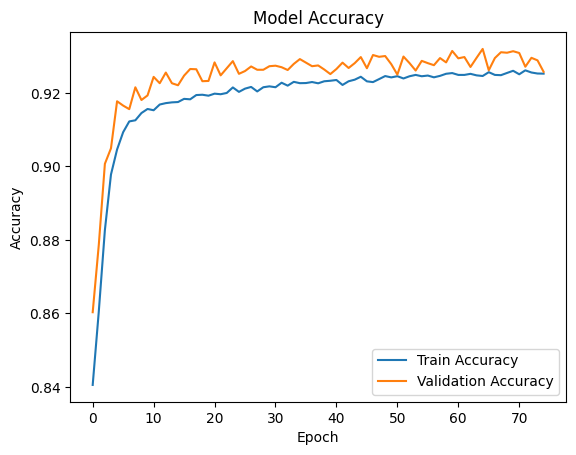

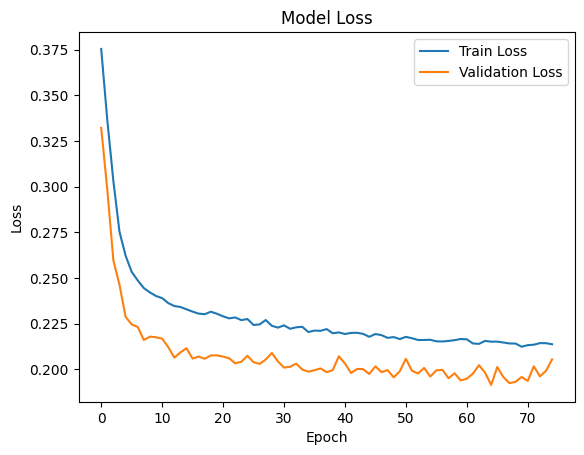

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

### ROC Curve

452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


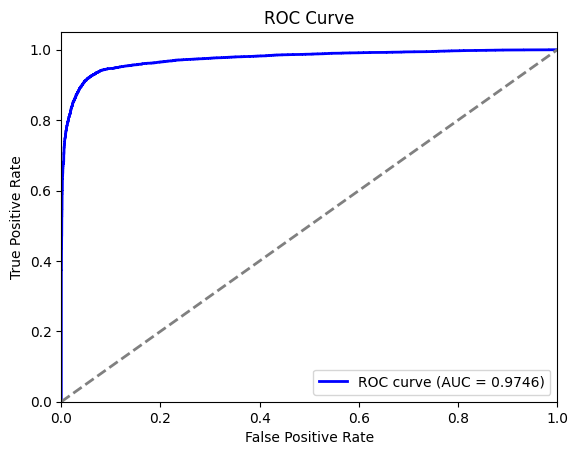

In [19]:
# Predicting probability values on the test set
y_pred_prob = model.predict(X_test)

# Calculating False Positive Rate (FPR), True Positive Rate (TPR), and decision thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

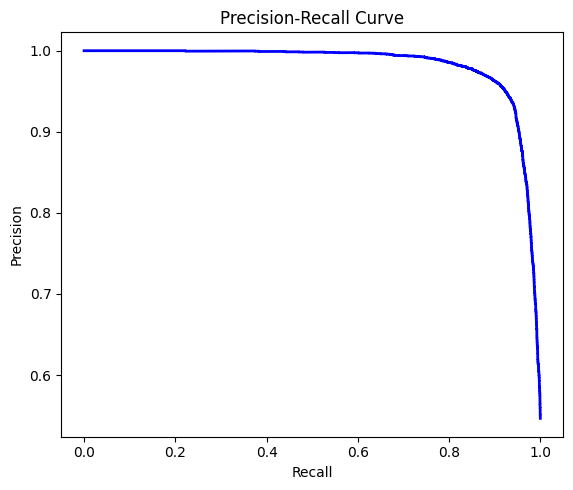

In [20]:
# Plotting the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Precision-Recall Curve Subplot
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()